In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [3]:
df = pd.read_csv('dataset2.csv')
df.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,NaN,HTTP/1.1,0.000000,0.069129,0.069188,NaN,0.0,3815.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
1,404,NaN,HTTP/1.1,0.000000,0.077291,0.077333,NaN,0.0,3320.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,NaN,13.0,GET,False,NaN,miss,1,0,0,NaN
3,404,NaN,HTTP/1.1,0.000000,0.069060,0.069112,NaN,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,NaN,miss,1,0,0,NaN
4,404,NaN,HTTP/1.1,0.000000,0.104557,0.104600,NaN,0.0,4727.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN


In [4]:
df.shape

(88435, 30)

In [5]:
df.describe()

,statuscode,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,uamajor,uafamily,devicefamily,...,coordinates,livechannel,devicemodel,devicebrand,host,assetnumber,@version,cachename,popname,uid
count,88435.000000,88435.000000,88381.000000,88435.000000,1.281800e+04,76713.000000,7.957800e+04,33826.000000,76713.000000,76713.000000,...,88290.000000,37459.000000,42160.000000,42160.000000,88143.000000,26.000000,88435.0,88435.000000,88435.0,18917.000000
mean,427.389111,5.276034,0.462742,0.467105,1.020985e+05,0.788263,5.489040e+05,10.107166,8.441542,9.610588,...,551.362793,49.766518,16.363805,1.559559,7.577925,1023.538462,1.0,1.029445,0.0,7683.962785
std,40.058801,8.793875,1.916252,1.932443,1.758800e+06,1.108278,3.763814e+05,14.145579,11.343114,39.188949,...,1521.924543,38.313771,49.536725,4.214804,12.023056,911.970229,0.0,0.816312,0.0,6094.885603
min,404.000000,0.000000,0.000015,0.000000,6.000000e+01,0.000000,1.800000e+01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,1.0,0.000000,0.0,0.000000
25%,404.000000,0.206349,0.013535,0.013579,3.600000e+03,0.000000,2.284880e+05,1.000000,1.000000,0.000000,...,1.000000,14.000000,0.000000,0.000000,1.000000,258.000000,1.0,0.000000,0.0,1616.000000
50%,405.000000,0.285714,0.034024,0.034078,3.600000e+03,1.000000,4.578860e+05,4.000000,2.000000,1.000000,...,1.000000,60.000000,0.000000,0.000000,2.000000,680.500000,1.0,1.000000,0.0,7315.000000
75%,412.000000,3.047619,0.046529,0.046600,3.600000e+03,1.000000,8.467730e+05,14.000000,12.000000,1.000000,...,88.000000,60.000000,0.000000,0.000000,7.000000,1814.000000,1.0,2.000000,0.0,11357.000000
max,503.000000,23.888889,60.072557,60.072603,3.153600e+07,9.000000,1.281547e+06,141.000000,81.000000,822.000000,...,19519.000000,319.000000,799.000000,24.000000,59.000000,2530.000000,1.0,2.000000,0.0,26804.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      88435 non-null  int64  
 1   contenttype     76851 non-null  object 
 2   protocol        88435 non-null  object 
 3   contentlength   88435 non-null  float64
 4   timefirstbyte   88381 non-null  float64
 5   timetoserv      88435 non-null  float64
 6   maxage          12818 non-null  float64
 7   osfamily        76713 non-null  float64
 8   sid             79578 non-null  float64
 9   cachecontrol    88435 non-null  object 
 10  uamajor         33826 non-null  float64
 11  uafamily        76713 non-null  float64
 12  devicefamily    76713 non-null  float64
 13  fragment        88435 non-null  bool   
 14  path            88435 non-null  int64  
 15  @timestamp      88435 non-null  object 
 16  contentpackage  26 non-null     float64
 17  coordinates     88290 non-null 

In [7]:
df.isnull().sum()

statuscode            0
contenttype       11584
protocol              0
contentlength         0
timefirstbyte        54
timetoserv            0
maxage            75617
osfamily          11722
sid                8857
cachecontrol          0
uamajor           54609
uafamily          11722
devicefamily      11722
fragment              0
path                  0
@timestamp            0
contentpackage    88409
coordinates         145
livechannel       50976
devicemodel       46275
devicebrand       46275
host                292
method                4
manifest              0
assetnumber       88409
hit                  54
@version              0
cachename             0
popname               0
uid               69518
dtype: int64

<AxesSubplot:>

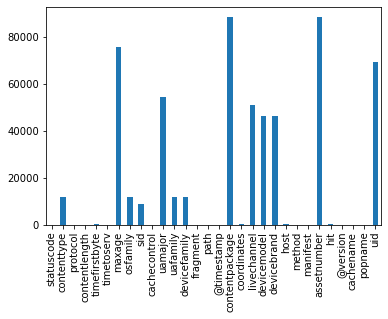

In [8]:
df.isnull().sum().plot.bar(x="Features", y="Missing Values")

In [9]:
df.nunique()

statuscode            8
contenttype           8
protocol              2
contentlength        22
timefirstbyte     38823
timetoserv        38422
maxage                5
osfamily             10
sid               43175
cachecontrol          6
uamajor              47
uafamily             27
devicefamily         68
fragment              1
path              13649
@timestamp        52092
contentpackage       11
coordinates        1586
livechannel         156
devicemodel          68
devicebrand          12
host                 37
method               20
manifest              1
assetnumber          11
hit                   1
@version              1
cachename             3
popname               1
uid                1276
dtype: int64

In [10]:
df_1 = df.copy()

Replacing Null values with -1

In [11]:
df_1.fillna("-1", inplace = True)

# ChiSquared for Feature Selection

In [12]:
df_1.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,-1,HTTP/1.1,0.000000,0.069129,0.069188,-1,0.0,3815.0,Cache-Control:,...,-1,0.0,GET,False,-1,miss,1,0,0,-1
1,404,-1,HTTP/1.1,0.000000,0.077291,0.077333,-1,0.0,3320.0,Cache-Control:,...,-1,0.0,GET,False,-1,miss,1,0,0,-1
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,-1,13.0,GET,False,-1,miss,1,0,0,-1
3,404,-1,HTTP/1.1,0.000000,0.06906,0.069112,-1,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,-1,miss,1,0,0,-1
4,404,-1,HTTP/1.1,0.000000,0.104557,0.104600,-1,0.0,4727.0,Cache-Control:,...,-1,0.0,GET,False,-1,miss,1,0,0,-1


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      88435 non-null  int64  
 1   contenttype     88435 non-null  object 
 2   protocol        88435 non-null  object 
 3   contentlength   88435 non-null  float64
 4   timefirstbyte   88435 non-null  object 
 5   timetoserv      88435 non-null  float64
 6   maxage          88435 non-null  object 
 7   osfamily        88435 non-null  object 
 8   sid             88435 non-null  object 
 9   cachecontrol    88435 non-null  object 
 10  uamajor         88435 non-null  object 
 11  uafamily        88435 non-null  object 
 12  devicefamily    88435 non-null  object 
 13  fragment        88435 non-null  bool   
 14  path            88435 non-null  int64  
 15  @timestamp      88435 non-null  object 
 16  contentpackage  88435 non-null  object 
 17  coordinates     88435 non-null 

In [19]:
df_1=df_1.drop(labels=["fragment","manifest","hit","@version","popname"],axis=1)

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      88435 non-null  int64  
 1   contenttype     88435 non-null  object 
 2   protocol        88435 non-null  object 
 3   contentlength   88435 non-null  float64
 4   timefirstbyte   88435 non-null  object 
 5   timetoserv      88435 non-null  float64
 6   maxage          88435 non-null  object 
 7   osfamily        88435 non-null  object 
 8   sid             88435 non-null  object 
 9   cachecontrol    88435 non-null  object 
 10  uamajor         88435 non-null  object 
 11  uafamily        88435 non-null  object 
 12  devicefamily    88435 non-null  object 
 13  path            88435 non-null  int64  
 14  @timestamp      88435 non-null  object 
 15  contentpackage  88435 non-null  object 
 16  coordinates     88435 non-null  object 
 17  livechannel     88435 non-null 

<AxesSubplot:>

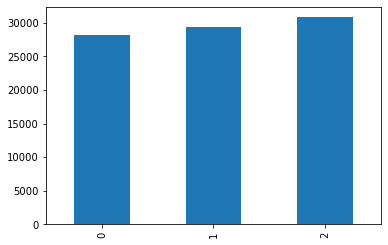

In [21]:
df_1.cachename.value_counts().sort_values().plot.bar()

In [22]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
df_1['protocol']= le.fit_transform(df_1['cachename'])
df_1['protocol']= le.fit_transform(df_1['path'])

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      88435 non-null  int64  
 1   contenttype     88435 non-null  object 
 2   protocol        88435 non-null  int64  
 3   contentlength   88435 non-null  float64
 4   timefirstbyte   88435 non-null  object 
 5   timetoserv      88435 non-null  float64
 6   maxage          88435 non-null  object 
 7   osfamily        88435 non-null  object 
 8   sid             88435 non-null  object 
 9   cachecontrol    88435 non-null  object 
 10  uamajor         88435 non-null  object 
 11  uafamily        88435 non-null  object 
 12  devicefamily    88435 non-null  object 
 13  path            88435 non-null  int64  
 14  @timestamp      88435 non-null  object 
 15  contentpackage  88435 non-null  object 
 16  coordinates     88435 non-null  object 
 17  livechannel     88435 non-null 

In [25]:
df_1['path'] = df['path'].astype(object)
df_1['cachename'] = df['cachename'].astype(object)

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      88435 non-null  int64  
 1   contenttype     88435 non-null  object 
 2   protocol        88435 non-null  int64  
 3   contentlength   88435 non-null  float64
 4   timefirstbyte   88435 non-null  object 
 5   timetoserv      88435 non-null  float64
 6   maxage          88435 non-null  object 
 7   osfamily        88435 non-null  object 
 8   sid             88435 non-null  object 
 9   cachecontrol    88435 non-null  object 
 10  uamajor         88435 non-null  object 
 11  uafamily        88435 non-null  object 
 12  devicefamily    88435 non-null  object 
 13  path            88435 non-null  object 
 14  @timestamp      88435 non-null  object 
 15  contentpackage  88435 non-null  object 
 16  coordinates     88435 non-null  object 
 17  livechannel     88435 non-null 

In [27]:
df_2 = df_1.copy()

In [28]:
categorical_cols = df_1.select_dtypes(include= "object").columns
categorical_cols

Index(['contenttype', 'timefirstbyte', 'maxage', 'osfamily', 'sid',
       'cachecontrol', 'uamajor', 'uafamily', 'devicefamily', 'path',
       '@timestamp', 'contentpackage', 'coordinates', 'livechannel',
       'devicemodel', 'devicebrand', 'host', 'method', 'assetnumber',
       'cachename', 'uid'],
      dtype='object')

In [29]:
# Convert object to category
df_1[categorical_cols] = df_1[categorical_cols].apply(lambda x:x.astype("category"))

In [30]:
# encoding
df_1[categorical_cols]=df_1[categorical_cols].apply(lambda x: x.cat.codes)

In [31]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      88435 non-null  int64  
 1   contenttype     88435 non-null  int8   
 2   protocol        88435 non-null  int64  
 3   contentlength   88435 non-null  float64
 4   timefirstbyte   88435 non-null  int32  
 5   timetoserv      88435 non-null  float64
 6   maxage          88435 non-null  int8   
 7   osfamily        88435 non-null  int8   
 8   sid             88435 non-null  int32  
 9   cachecontrol    88435 non-null  int8   
 10  uamajor         88435 non-null  int8   
 11  uafamily        88435 non-null  int8   
 12  devicefamily    88435 non-null  int8   
 13  path            88435 non-null  int16  
 14  @timestamp      88435 non-null  int32  
 15  contentpackage  88435 non-null  int8   
 16  coordinates     88435 non-null  int16  
 17  livechannel     88435 non-null 

In [32]:
df_1.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename,uid
0,404,0,227,0.000000,29049,0.069188,5,0,127,0,...,11,346,156,68,12,0,9,11,0,1276
1,404,0,324,0.000000,30935,0.077333,5,0,100,0,...,11,64,156,68,12,0,9,11,0,1276
2,404,3,160,0.206349,21756,0.049450,1,0,134,3,...,11,1,156,68,12,11,9,11,0,1276
3,404,0,360,0.000000,29020,0.069112,5,3,144,0,...,11,1,156,1,1,0,9,11,0,1276
4,404,0,223,0.000000,32524,0.104600,5,0,151,0,...,11,1,156,68,12,0,9,11,0,1276


In [44]:
X = df_1[categorical_cols]
y = df_1["statuscode"]

In [45]:
# Lets use the sklearn chi2 fnction
cs = SelectKBest(score_func=chi2,k=21)
cs.fit(X,y)
feature_score = pd.DataFrame({"Score":cs.scores_,"P_Value":cs.pvalues_},index=X.columns)
feature_score.nlargest(n=21,columns="Score")

,Score,P_Value
sid,4.622217e+08,0.000000e+00
timefirstbyte,3.264082e+08,0.000000e+00
path,2.889159e+08,0.000000e+00
@timestamp,4.671225e+07,0.000000e+00
coordinates,6.673892e+06,0.000000e+00
uid,5.005399e+06,0.000000e+00
livechannel,2.377327e+06,0.000000e+00
devicefamily,1.705639e+06,0.000000e+00
devicemodel,1.010551e+06,0.000000e+00
host,6.145696e+05,0.000000e+00


# ExtraTreesClassifier

In [114]:
import sklearn
from sklearn.model_selection import train_test_split
n = df.copy()
n.shape
n=n.drop(labels=["statuscode"],axis=1)
n=n.apply(lambda x:x.astype("category"))
n=n.apply(lambda x: x.cat.codes)
n=n.drop(labels=["fragment","manifest","hit","@version","popname"],axis=1)
n.head()

,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,uamajor,...,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename,uid
0,-1,1,0,29049,28640,-1,0,127,0,0,...,-1,346,-1,-1,-1,0,8,-1,0,-1
1,-1,1,0,30935,30524,-1,0,100,0,0,...,-1,64,-1,-1,-1,0,8,-1,0,-1
2,2,1,1,21756,21523,1,0,134,3,14,...,-1,1,-1,-1,-1,11,8,-1,0,-1
3,-1,1,0,29020,28607,-1,3,144,0,10,...,-1,1,-1,1,1,0,8,-1,0,-1
4,-1,1,0,32524,32092,-1,0,151,0,0,...,-1,1,-1,-1,-1,0,8,-1,0,-1


In [115]:
x_train, x_test, y_train, y_test = train_test_split(n, y, test_size = 0.2, random_state = 100)

In [116]:
x_train.shape

(70748, 24)

In [117]:
from sklearn.ensemble import ExtraTreesClassifier

In [118]:
etc = ExtraTreesClassifier(criterion='entropy')

In [119]:
etc.fit(x_train, y_train)

ExtraTreesClassifier(criterion='entropy')

In [120]:
pred_etc = etc.predict(x_test)

In [121]:
from sklearn.metrics import confusion_matrix
tab_etc = confusion_matrix(pred_etc, y_test)

In [122]:
tab_etc

array([[8874,    0,    0,    2,    0,    0,    0,    0],
       [   0, 1723,    0,    0,    0,    0,    0,    0],
       [   0,    0, 3112,    0,    0,    0,    0,    0],
       [   0,    0,    0,    3,    0,    0,    0,    0],
       [   0,    0,    0,    0,    9,    0,    0,    0],
       [   0,    0,    0,    0,    0,   35,    0,    0],
       [   0,    0,    0,    0,    0,    0, 3885,    0],
       [   0,    0,    0,    0,    0,    0,    0,   44]], dtype=int64)

In [123]:
etc.feature_importances_

array([1.27764575e-01, 5.04884488e-02, 2.24849967e-01, 7.65299784e-02,
       8.38278521e-02, 6.51321563e-03, 2.46468486e-02, 4.63928291e-02,
       1.60945571e-02, 6.22931535e-03, 2.81672598e-02, 6.25409211e-03,
       3.40137373e-02, 2.36960307e-02, 1.46102324e-04, 4.05878438e-03,
       6.16402258e-02, 2.38379584e-03, 1.76444482e-02, 8.57093708e-02,
       1.39822526e-02, 1.44083975e-04, 2.21849434e-03, 5.66037350e-02])

In [124]:
feature_importance = pd.DataFrame({"Features" : x_train.columns, "Score" :etc.feature_importances_})
feature_importance

,Features,Score
0,contenttype,0.127765
1,protocol,0.050488
2,contentlength,0.224850
3,timefirstbyte,0.076530
4,timetoserv,0.083828
5,maxage,0.006513
6,osfamily,0.024647
7,sid,0.046393
8,cachecontrol,0.016095
9,uamajor,0.006229


In [125]:
feature_importance =  feature_importance.sort_values('Score', ascending=False)
feature_importance

,Features,Score
2,contentlength,0.224850
0,contenttype,0.127765
19,host,0.085709
4,timetoserv,0.083828
3,timefirstbyte,0.076530
16,livechannel,0.061640
23,uid,0.056604
1,protocol,0.050488
7,sid,0.046393
12,path,0.034014


# Forward Feature Selection

In [88]:
pip install mlxtend

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [90]:
feature_names=tuple(n.columns)
feature_names

('contenttype',
 'protocol',
 'contentlength',
 'timefirstbyte',
 'timetoserv',
 'maxage',
 'osfamily',
 'sid',
 'cachecontrol',
 'uamajor',
 'uafamily',
 'devicefamily',
 'fragment',
 'path',
 '@timestamp',
 'contentpackage',
 'coordinates',
 'livechannel',
 'devicemodel',
 'devicebrand',
 'host',
 'method',
 'manifest',
 'assetnumber',
 'hit',
 '@version',
 'cachename',
 'popname',
 'uid')

In [126]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)

KNeighborsClassifier()

In [127]:
sfs1 = SFS(model, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=0)


sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  4.4min remaining:   23.7s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.7min finished

[2022-02-23 17:56:42] Features: 1/10 -- score: 0.9921411205970487[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:  2.5min remaining:   22.5s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  2.8min finished

[2022-02-23 17:59:28] Features: 2/10 -- score: 0.9992791315655566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:  3.3min remaining:   31.1s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  3.5min finished

[2022-02-23 18:02:59] Features: 3/10 -- score: 0.9993639396166676[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21

In [128]:
sfs1.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.99214112]),
  'avg_score': 0.9921411205970487,
  'feature_names': ('contentlength',)},
 2: {'feature_idx': (2, 20),
  'cv_scores': array([0.99927913]),
  'avg_score': 0.9992791315655566,
  'feature_names': ('contentlength', 'method')},
 3: {'feature_idx': (0, 2, 20),
  'cv_scores': array([0.99936394]),
  'avg_score': 0.9993639396166676,
  'feature_names': ('contenttype', 'contentlength', 'method')},
 4: {'feature_idx': (0, 1, 2, 20),
  'cv_scores': array([0.99936394]),
  'avg_score': 0.9993639396166676,
  'feature_names': ('contenttype', 'protocol', 'contentlength', 'method')},
 5: {'feature_idx': (0, 1, 2, 5, 20),
  'cv_scores': array([0.99936394]),
  'avg_score': 0.9993639396166676,
  'feature_names': ('contenttype',
   'protocol',
   'contentlength',
   'maxage',
   'method')},
 6: {'feature_idx': (0, 1, 2, 5, 8, 20),
  'cv_scores': array([0.99936394]),
  'avg_score': 0.9993639396166676,
  'feature_names': ('contenttype',
   'protoco

In [129]:
sfs1.get_metric_dict()

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (2,),
  'cv_scores': array([0.99214112]),
  'avg_score': 0.9921411205970487,
  'feature_names': ('contentlength',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (2, 20),
  'cv_scores': array([0.99927913]),
  'avg_score': 0.9992791315655566,
  'feature_names': ('contentlength', 'method'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 2, 20),
  'cv_scores': array([0.99936394]),
  'avg_score': 0.9993639396166676,
  'feature_names': ('contenttype', 'contentlength', 'method'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 1, 2, 20),
  'cv_scores': array([0.99936394]),
  'avg_score': 0.9993639396166676,
  'feature_names': ('contenttype', 'protocol', 'contentlength', 'method'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 1, 2, 5, 20),
  'cv_scores': array([0.99936394]),
  'avg_score': 0.9993639396166676,
  'feature_names': ('contenttype',
 

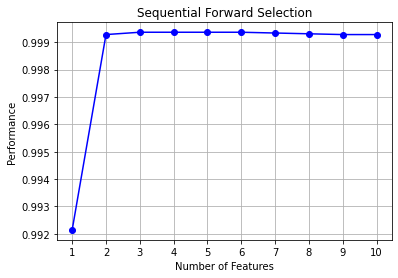

In [130]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [131]:
sfs1.k_feature_idx_

(0, 1, 2, 5, 8, 14, 19, 20, 21, 22)

In [132]:
df.columns[1:][list(sfs1.k_feature_idx_)]

Index(['contenttype', 'protocol', 'contentlength', 'maxage', 'cachecontrol',
       '@timestamp', 'devicebrand', 'host', 'method', 'manifest'],
      dtype='object')

# Correlation-based Feature selection

In [133]:
x_train.corr()

,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,uamajor,...,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename,uid
contenttype,1.000000,-0.347002,0.351033,-0.480138,-0.478109,-0.380553,0.116194,-0.146723,-0.378352,-0.278716,...,-0.013972,-0.339920,0.079688,-0.255072,-0.186531,0.255801,0.354850,-0.014167,0.028498,0.086240
protocol,-0.347002,1.000000,-0.004874,0.355657,0.354997,0.119934,0.216256,0.342937,0.120126,-0.097832,...,0.004746,0.132270,0.190535,0.083454,0.130707,-0.676288,-0.747487,0.004745,0.014540,0.126001
contentlength,0.351033,-0.004874,1.000000,-0.488702,-0.487307,-0.307019,-0.270364,0.214659,-0.308640,-0.291651,...,0.009486,0.184182,0.610830,-0.175351,-0.235525,0.107689,0.021895,0.009965,0.103304,-0.090320
timefirstbyte,-0.480138,0.355657,-0.488702,1.000000,0.998178,0.201134,0.131457,0.112237,0.203873,0.123659,...,0.022010,0.050289,-0.314497,0.144825,0.172456,-0.378522,-0.342802,0.021832,-0.035651,0.002278
timetoserv,-0.478109,0.354997,-0.487307,0.998178,1.000000,0.200628,0.131163,0.111923,0.203362,0.122240,...,0.021949,0.049585,-0.313313,0.144221,0.171978,-0.377834,-0.342255,0.021768,-0.035446,0.003107
maxage,-0.380553,0.119934,-0.307019,0.201134,0.200628,1.000000,-0.189098,0.088112,0.993355,0.679967,...,0.015205,-0.026949,-0.257390,0.391211,0.323567,0.283716,-0.115610,0.014213,-0.028511,-0.175125
osfamily,0.116194,0.216256,-0.270364,0.131457,0.131163,-0.189098,1.000000,-0.140791,-0.188823,0.061141,...,-0.006910,-0.154940,0.070320,0.031575,0.160086,-0.344829,-0.169563,-0.005604,-0.009925,0.404777
sid,-0.146723,0.342937,0.214659,0.112237,0.111923,0.088112,-0.140791,1.000000,0.089252,-0.081112,...,0.006139,0.129734,0.078495,-0.063875,-0.091783,-0.201776,-0.330573,0.006942,0.562822,-0.316950
cachecontrol,-0.378352,0.120126,-0.308640,0.203873,0.203362,0.993355,-0.188823,0.089252,1.000000,0.689125,...,-0.000731,-0.033048,-0.260238,0.396556,0.328812,0.286555,-0.115796,-0.000998,-0.027047,-0.175405
uamajor,-0.278716,-0.097832,-0.291651,0.123659,0.122240,0.679967,0.061141,-0.081112,0.689125,1.000000,...,-0.008347,0.054350,-0.258649,0.337685,0.286566,0.347186,0.103115,-0.008347,-0.035683,-0.117200


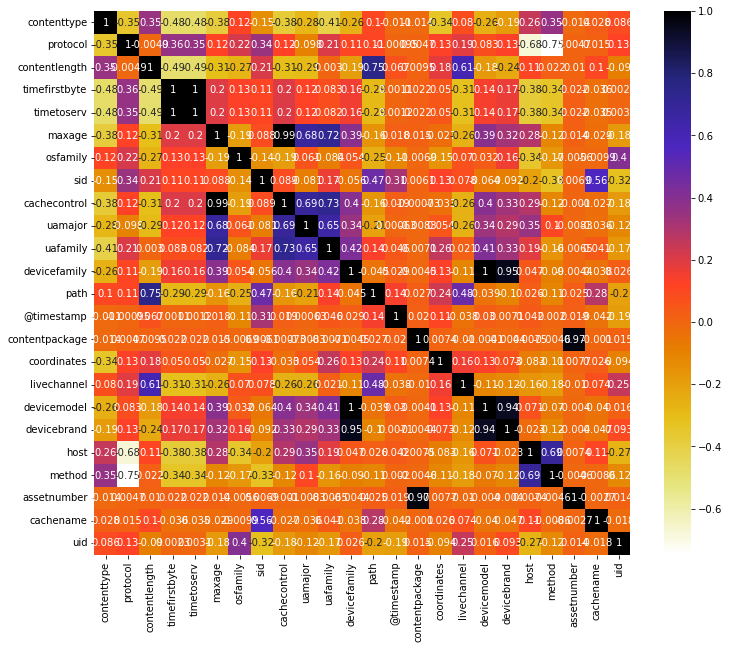

In [134]:
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [135]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [136]:
corr_features = correlation(x_train, 0.85)
len(set(corr_features))

5

In [137]:
corr_features

{'assetnumber', 'cachecontrol', 'devicebrand', 'devicemodel', 'timetoserv'}